# 0. Загрузка данных

In [215]:
import pandas as pd
import numpy as np
import datetime as dt

In [216]:
df_athletes = pd.read_csv('athletes.csv')
df_athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


# 1. Преобразование данных

In [217]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           11538 non-null  int64  
 1   name         11538 non-null  object 
 2   nationality  11538 non-null  object 
 3   sex          11538 non-null  object 
 4   dob          11537 non-null  object 
 5   height       11208 non-null  float64
 6   weight       10879 non-null  float64
 7   sport        11538 non-null  object 
 8   gold         11538 non-null  int64  
 9   silver       11538 non-null  int64  
 10  bronze       11538 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


## 1.1. Поиск пропущенных значений

Согласно таблице выше в датасете есть пропущенные значения в колонках dob, height и weight.

Дополнительно можно проверить остальные. Например, в колонках с типом данных object могут быть указаны значения "?", "-" и т.д.

In [218]:
df_athletes.sort_values(by='name').head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [219]:
df_athletes.sort_values(by='nationality').head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
5400,103254143,Kamia Yousufi,AFG,female,5/20/96,1.65,55.0,athletics,0,0,0
7682,289057786,Mohammad Tawfiq Bakhshi,AFG,male,3/11/86,1.81,99.0,judo,0,0,0
51,152408417,Abdul Wahab Zahiri,AFG,male,5/27/92,1.75,68.0,athletics,0,0,0
3196,103773001,Evagjelia Veli,ALB,female,7/16/91,1.60,52.0,weightlifting,0,0,0
6439,915002256,Luiza Gega,ALB,female,11/5/88,1.59,45.0,athletics,0,0,0


In [220]:
df_athletes.sort_values(by='sport').head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
6024,603343722,Laura Teani,ITA,female,3/13/91,1.75,75.0,aquatics,0,1,0
9052,518813071,Risako Mitsui,JPN,female,9/23/93,1.68,56.0,aquatics,0,0,2
4540,355490411,Jahir Ocampo,MEX,male,1/12/90,1.78,80.0,aquatics,0,0,0
2734,281803950,Douglas John Erasmus,RSA,male,4/4/90,1.82,78.0,aquatics,0,0,0
5518,495858343,Katerine Savard,CAN,female,5/26/93,1.67,54.0,aquatics,0,0,1


In [221]:
df_athletes['sex'].value_counts()

male      6333
female    5205
Name: sex, dtype: int64

Пропущенных значений в name, nationality, sex, sport нет.

## 1.2. Преобразование/удаление пропущенных значений

### 1.2.1. Day of birth

In [222]:
df_athletes[df_athletes['dob'].isna()]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,NaN,NaN,NaN,sailing,0,0,0


In [223]:
len(df_athletes.loc[(df_athletes['sport'] == 'sailing') & (df_athletes['sex'] == 'male')])

217

Заполнить дату рождения по только имеющимся данным в датасете невозможно.
Для этой записи в таблице также не указаны вес и рост (дата формирования датасета неизвестна, а рост и вес все таки могут меняться со временем).

Всего в датасете 217 записей с одинаковыми параметрами вида спорта и пола спортсмена.

В данном случае (когда количество строк с пустыми значениями незначительно) можно заменить пропуски. Но не средним значением, а по сути восстановить данные, взяв изформацию о спортсмене из интернета:

- weight = 65.0
- height = 1.75
- dob = 25/12/87

In [224]:
df_athletes.loc[df_athletes['id'] == 663676373, 'dob'] = '25/12/87'
df_athletes.loc[df_athletes['id'] == 663676373, 'weight'] = 65.0
df_athletes.loc[df_athletes['id'] == 663676373, 'height'] = 1.75

df_athletes.loc[df_athletes['id'] == 663676373]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
8546,663676373,Pavel Sozykin,RUS,male,25/12/87,1.75,65.0,sailing,0,0,0


### 1.2.2. Weight

Для начала можно разбить пропуски по виду спорта и посмотреть на количество пустых и непустых значений weight.

Больше всего приходится на **boxing** (286) и **athletics** (163). Плюс можно рассмотреть **aquatics**, **football** и **cycling**. Для остальных видов спорта совсем небольшое количество пустых значений weight, их можно удалить.

In [225]:
pd.concat([df_athletes[~(df_athletes['weight'].isna())].sport.value_counts(),
           df_athletes[(df_athletes['weight'].isna())].sport.value_counts()],
          keys = ['weight is not Nan', 'weight is NaN'], axis=1
).sort_values('weight is NaN', ascending=False)

,weight is not Nan,weight is NaN
boxing,NaN,286.0
athletics,2200.0,163.0
aquatics,1399.0,46.0
football,583.0,28.0
cycling,502.0,23.0
handball,349.0,14.0
judo,380.0,12.0
rowing,535.0,12.0
shooting,380.0,10.0
badminton,164.0,8.0


In [226]:
len(df_athletes[~(df_athletes['weight'].isna()) & (df_athletes['sport'] == 'boxing')])

0

В случае **boxing** в датасете нет записей с непустыми значениями weight, т.е. нет данных для заполнения пропусков. Такие значения можно удалить.

In [227]:
df_athletes = df_athletes.drop(df_athletes[(df_athletes['weight'].isna()) & (df_athletes['sport'] == 'boxing')].index)

Средние значения записей **athletics** без пропусков в датафрейме можно использовать для заполнения пропусков, разбив спортсменов по полу и росту.

In [228]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'athletics')
           & (df_athletes['sex'] == 'male')
           & (df_athletes['height'] > 1.60)
           & (df_athletes['height'] < 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'athletics')
              & (df_athletes['sex'] == 'male')
              & (df_athletes['height'] > 1.60)
              & (df_athletes['height'] < 1.80), 'weight'] = mean_weight

In [229]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'athletics')
           & (df_athletes['sex'] == 'male')
           & (df_athletes['height'] > 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'athletics')
              & (df_athletes['sex'] == 'male')
              & (df_athletes['height'] > 1.80), 'weight'] = mean_weight

In [230]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'athletics')
           & (df_athletes['sex'] == 'female')
           & (df_athletes['height'] < 1.60)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'athletics')
              & (df_athletes['sex'] == 'female')
              & (df_athletes['height'] < 1.60), 'weight'] = mean_weight

In [231]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'athletics')
           & (df_athletes['sex'] == 'female')
           & (df_athletes['height'] > 1.60)
           & (df_athletes['height'] < 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'athletics')
              & (df_athletes['sex'] == 'female')
              & (df_athletes['height'] > 1.60)
              & (df_athletes['height'] < 1.80), 'weight'] = mean_weight

Оствшиеся записи для athletics можно удалить, т.к. в них не указан ни рост, ни вес спортсмена. А заполнять 154 записи средним значением роста и веса некорректно.

In [232]:
df_athletes = df_athletes.drop(df_athletes[(df_athletes['weight'].isna()) & (df_athletes['sport'] == 'athletics')].index)

В пропусках с видом спорта **aquatics** не указан рест и вес - удаляем.

In [233]:
len(df_athletes[(df_athletes['weight'].isna()) & ~(df_athletes['height'].isna()) & (df_athletes['sport'] == 'aquatics')])

0

In [234]:
df_athletes = df_athletes.drop(df_athletes[(df_athletes['weight'].isna()) & (df_athletes['sport'] == 'aquatics')].index)

Пропуски для **football** и **cycling** можно запонить по аналогии с athletics (использовать среднее значение, разбив спортсменов по полу и росту).

In [235]:
df_athletes[~(df_athletes['height'].isna()) & (df_athletes['weight'].isna()) & (df_athletes['sport'] == 'football')]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
57,153457,Abdullahi Shehu,NGR,male,3/12/93,1.70,NaN,football,0,0,1
628,389896499,Aminu Umar,NGR,male,3/6/95,1.72,NaN,football,0,0,1
2304,161929163,Daniel Akpeyi,NGR,male,3/8/86,1.87,NaN,football,0,0,1
3057,102727571,Emmanuel Daniel,NGR,male,12/17/93,1.74,NaN,football,0,0,1
4311,712856100,Imoh Ezekiel,NGR,male,10/24/93,1.71,NaN,football,0,0,1
5039,299026310,John Obi Mikel,NGR,male,4/22/87,1.73,NaN,football,0,0,1
5764,240927532,Kingsley Madu,NGR,male,12/12/95,1.71,NaN,football,0,0,1
7759,111349032,Muenfuh Sincere,NGR,male,4/28/98,1.70,NaN,football,0,0,1
7960,328956324,Ndifreke Udo,NGR,male,8/15/98,1.73,NaN,football,0,0,1
8217,598707040,Oghenekaro Etebo,NGR,male,11/9/95,1.72,NaN,football,0,0,1


In [236]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'football')
           & (df_athletes['sex'] == 'male')
           & (df_athletes['height'] > 1.60)
           & (df_athletes['height'] < 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'football')
              & (df_athletes['sex'] == 'male')
              & (df_athletes['height'] > 1.60)
              & (df_athletes['height'] < 1.80), 'weight'] = mean_weight

In [237]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'football')
           & (df_athletes['sex'] == 'male')
           & (df_athletes['height'] > 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'football')
              & (df_athletes['sex'] == 'male')
              & (df_athletes['height'] > 1.80), 'weight'] = mean_weight

In [238]:
df_athletes[~(df_athletes['height'].isna()) & (df_athletes['weight'].isna()) & (df_athletes['sport'] == 'cycling')]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
3461,861278504,Francelina Cabral,TLS,female,3/23/85,1.65,NaN,cycling,0,0,0
10532,975655821,Ting Ying Huang,TPE,female,5/29/90,1.60,NaN,cycling,0,0,0


In [239]:
mean_weight = df_athletes[~(df_athletes['weight'].isna())
           & (df_athletes['sport'] == 'cycling')
           & (df_athletes['sex'] == 'male')
           & (df_athletes['height'] > 1.50)
           & (df_athletes['height'] < 1.80)].weight.describe()[1]

df_athletes.loc[(df_athletes['weight'].isna())
              & (df_athletes['sport'] == 'cycling')
              & (df_athletes['sex'] == 'male')
              & (df_athletes['height'] > 1.50)
              & (df_athletes['height'] < 1.80), 'weight'] = mean_weight

Все остальные пропуски в weight удаляем.

In [240]:
df_athletes = df_athletes.drop(df_athletes[(df_athletes['weight'].isna())].index)

### 1.2.3. Height

In [241]:
pd.concat([df_athletes[~(df_athletes['height'].isna())].sport.value_counts(),
           df_athletes[(df_athletes['height'].isna())].sport.value_counts()],
          keys = ['height is not Nan', 'height is NaN'], axis=1
).sort_values('height is NaN', ascending=False)

,height is not Nan,height is NaN
athletics,2196,13.0
aquatics,1396,3.0
judo,377,3.0
rugby sevens,296,1.0
table tennis,168,1.0
football,601,NaN
rowing,535,NaN
cycling,502,NaN
hockey,432,NaN
volleyball,382,NaN


В случае **height** после замены и удаления пропусков в weight осталось совсем немного записей с пропусками (по отношению к данным без пропусков), их можно удалить.

In [242]:
df_athletes = df_athletes.drop(df_athletes[(df_athletes['height'].isna())].index)

In [243]:
df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 11537
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10886 non-null  int64  
 1   name         10886 non-null  object 
 2   nationality  10886 non-null  object 
 3   sex          10886 non-null  object 
 4   dob          10886 non-null  object 
 5   height       10886 non-null  float64
 6   weight       10886 non-null  float64
 7   sport        10886 non-null  object 
 8   gold         10886 non-null  int64  
 9   silver       10886 non-null  int64  
 10  bronze       10886 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1020.6+ KB


## 1.3. Работа с категориальными переменными

In [244]:
df_athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


**name** и **id** можно исключить из выборки для обучения. Необходимо закодировать **nationality**,	**sex**,	**dob** и **sport**.

В случае **dob** можно добавить новый признак - возраст. Необходимо преобразовать дату рождения из object в datetime и вычесть ее из текущей даты.

Но для начала придется исправить год рождения в данных, т.к. to_datetime() некорректно обрабатывает некоторые значения, например, для "10/17/69" возвращает значение "2069-10-17".

In [245]:
print(sorted(df_athletes['dob'].str[-2:].unique()))

['00', '01', '02', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


Для '00', '01', '02' добавить в начале '20', а для остальных '19'.

In [246]:
df_athletes.loc[df_athletes['dob'].str[-2:].isin(['00', '01', '02']), 'dob'] = df_athletes['dob'].str[:-2] + '20' + df_athletes['dob'].str[-2:]

In [247]:
df_athletes.loc[~(df_athletes['dob'].str[-2:].isin(['00', '01', '02'])), 'dob'] = df_athletes['dob'].str[:-2] + '19' + df_athletes['dob'].str[-2:]

In [248]:
df_athletes.head(-5)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/1969,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/1986,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/1992,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/1991,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/1990,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11528,499425013,Zsofia Kovacs,HUN,female,4/6/2000,1.58,49.0,gymnastics,0,0,0
11529,862285226,Zsombor Berecz,HUN,male,4/26/1986,1.95,95.0,sailing,0,0,0
11530,739315046,Zsuzsanna Jakabos,HUN,female,4/3/1989,1.85,70.0,aquatics,0,0,0
11531,600541319,Zurabi Datunashvili,GEO,male,6/18/1991,1.83,75.0,wrestling,0,0,0


In [249]:
df_athletes['age'] = (pd.datetime.today() - pd.to_datetime(df_athletes.dob)).astype('<m8[Y]')
df_athletes.head()

<ipython-input-249-889322adc9ff>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_athletes['age'] = (pd.datetime.today() - pd.to_datetime(df_athletes.dob)).astype('<m8[Y]')
<ipython-input-249-889322adc9ff>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_athletes['age'] = (pd.datetime.today() - pd.to_datetime(df_athletes.dob)).astype('<m8[Y]')


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/1969,1.72,64.0,athletics,0,0,0,54.0
1,532037425,A Lam Shin,KOR,female,9/23/1986,1.68,56.0,fencing,0,0,0,37.0
2,435962603,Aaron Brown,CAN,male,5/27/1992,1.98,79.0,athletics,0,0,1,31.0
3,521041435,Aaron Cook,MDA,male,1/2/1991,1.83,80.0,taekwondo,0,0,0,33.0
4,33922579,Aaron Gate,NZL,male,11/26/1990,1.81,71.0,cycling,0,0,0,33.0


Для **nationality**, **sex** и **sport** можно использовать LabelEncoder и pd.get_dummies().

In [250]:
from sklearn.preprocessing import LabelEncoder

In [251]:
X = pd.get_dummies(df_athletes, columns=['nationality', 'sport'])
X = X.drop(['id', 'name', 'sex', 'dob'], axis=1)

X.head()

,height,weight,gold,silver,bronze,age,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,0,54.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,37.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,31.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,33.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,33.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [252]:
le = LabelEncoder()
le.fit(df_athletes['sex'])

y = pd.Series(le.transform(df_athletes['sex']))
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

# 2. Разделение данных на train и test + обучение модели

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [255]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [256]:
predictions = model.predict_proba(X_test)

In [257]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8497932935231971, 0.8255280073461891)

# 3. ROC

In [258]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [259]:
fpr, tpr, thresholds = roc_curve(y_test, predictions[:, 1])

In [260]:
fpr_r, tpr_r, th_r = roc_curve(y_test, np.zeros(len(y_test)))

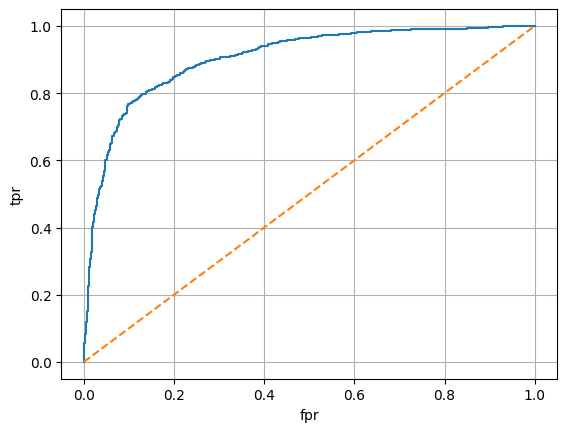

In [261]:
plt.plot(fpr, tpr)
plt.plot(fpr_r, tpr_r, '--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.show()

# 4. ROC-AUC

In [262]:
from sklearn.metrics import roc_auc_score

In [263]:
roc_auc = roc_auc_score(y_test, predictions[:, 1])
roc_auc

0.9042525703095252

# 5. TPR, FPR

In [264]:
def calculate(predictions, y_test, thresholds):
  tp = []
  fp = []
  tn = []
  fn = []

  for threshold in thresholds:
    pred = np.where(predictions >= threshold, 1, 0)

    tp.append(np.sum((pred == 1) & (y_test == 1)))
    fp.append(np.sum((pred == 1) & (y_test == 0)))
    tn.append(np.sum((pred == 0) & (y_test == 0)))
    fn.append(np.sum((pred == 0) & (y_test == 1)))

  return tp, fp, tn, fn

In [265]:
fpr_m = []
tpr_m = []

tp, fp, tn, fn = calculate(predictions[:, 1], y_test, np.linspace(0, 1, len(predictions)))

for i in range(len(tp)):
  tpr_m.append(tp[i] / (tp[i] + fn[i]))
  fpr_m.append(fp[i] / (fp[i] + tn[i]))

# 6. ROC

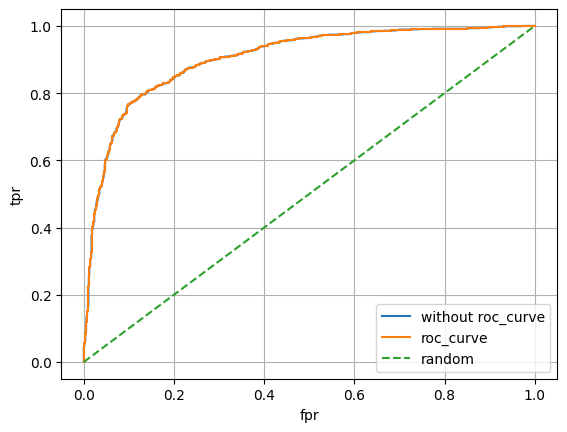

In [266]:
plt.plot(fpr_m, tpr_m, label='without roc_curve')
plt.plot(fpr, tpr, label='roc_curve')
plt.plot(fpr_r, tpr_r, '--', label='random')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.grid()
plt.show()

ROC-кривая, построенная с помощью функции roc_curve, и ROC-кривая, построенная с помощью вычисленных вручную метрик TPR и FPR, совпадают.

Площадь под кривой = 0.9. Обученная модель хорошо классифицирует спортсменов по полу.

# 7. Precision-Recall

In [267]:
from sklearn.metrics import precision_recall_curve

In [268]:
precision_m = []

for i in range(len(tp)):
  precision_m.append(tp[i] / (tp[i] + fp[i]))

<ipython-input-268-d6ae63f12056>:4: RuntimeWarning: invalid value encountered in scalar divide
  precision_m.append(tp[i] / (tp[i] + fp[i]))


Для проверки можно сравнить с графиком Precision-Recall для данных, вычисленных с помощью функции precision_recall_curve.

In [269]:
precision, recall, _ = precision_recall_curve(y_test, predictions[:, 1])

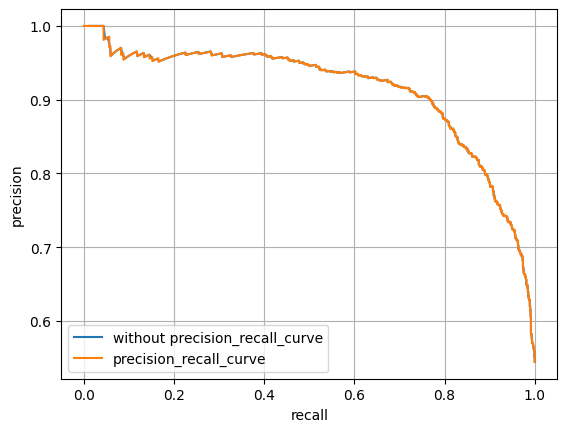

In [270]:
plt.plot(tpr_m, precision_m, label='without precision_recall_curve')
plt.plot(recall, precision, label='precision_recall_curve')
plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.show()

Графики совпадают.

# 8. ROC-AUC

In [271]:
from sklearn.metrics import auc

In [272]:
roc_auc_m = auc(fpr_m, tpr_m)

In [273]:
roc_auc_m - roc_auc

5.9497905673389084e-06

Разница между посчитанными через roc_auc_score и auc < 1e-6.

# 9. Выводы

In [274]:
tp = np.sum((predictions[:, 1] >=0.5) & (y_test == 1))
fp = np.sum((predictions[:, 1] >=0.5) & (y_test == 0))
tn = np.sum((predictions[:, 1] <0.5) & (y_test == 0))
fn = np.sum((predictions[:, 1] <0.5) & (y_test == 1))

print(f'accurancy = {(tp + tn) / (tp + tn + fp + fn)}')
print(f'precision = {tp / (tp + fp)}')
print(f'recall = {tp / (tp + fn)}')

accurancy = 0.8255280073461891
precision = 0.8358333333333333
recall = 0.845699831365936


ROC-кривая расположена достаточно близко к верхнему левому уголу графика. Площадь под кривой = 0.9.

Значение accurancy высокое. При этом и precision (модель отлично отличает один класс от другого), и recall (модель отлично обнаруживает тот или иной класс) тоже высокие.

Обученная модель отлично справляется с классификацией.



ROC-кривая может проходить ниже диагонали, но данный случай не является наихудшим (наихудший - совпадение ROC-кривой с диагональю). Это означает, что классификатор работает наоборот.